# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

  Using cached scipy-1.12.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/46.2 MB 435.7 kB/s eta 0:01:46
   ---------------------------------------- 0.3/46.2 MB 2.2 MB/s eta 0:00:21
    --------------------------------------- 0.7/46.2 MB 4.3 MB/s eta 0:00:11
    --------------------------------------- 0.9/46.2 MB 4.3 MB/s eta 0:00:11
    --------------------------------------- 1.1/46.2 MB 4.3 MB/s eta 0:00:11
    --------------------------------------- 1.1/46.2 MB 4.1 MB/s eta 0:00:12
    --------------------------------------- 1.1/46.2 MB 4.1 MB/s eta 0:00:12
   - -------------------------------------- 1.6/46.2 MB 4.0 MB/s eta 0:00:12
   - -------------------------------------- 1.8/46.2 MB 4.0 MB/s eta 0:00:11
   - -------------------------------------- 2.0/46.2 MB 4.1 MB/s eta 0:00:11
   - ------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 660.6 kB/s eta 0:00:20
      --------------------------------------- 0.3/12.8 MB 3.3 MB/s eta 0:00:04
     -- ------------------------------------- 0.7/12.8 MB 5.6 MB/s eta 0:00:03
     -- ------------------------------------- 0.9/12.8 MB 5.2 MB/s eta 0:00:03
     --- ------------------------------------ 1.0/12.8 MB 5.0 MB/s eta 0:00:03
     --- ------------------------------------ 1.0/12.8 MB 5.0 MB/s eta 0:00:03
     --- ------------------------------------ 1.0/12.8 MB 3.3 MB/s eta 0:00:04
     ----- ---------------------------------- 1.6/12.8 MB 4.5 MB/s eta 0:00:03
     ----- ---------------------------------- 1.8/12.8 MB 4.5 MB/s eta 0:00:03
     ------ --------------------------------- 1.9/12.8 MB 4.6 MB/s eta 0:00:03
     ------ --------------------------------- 2.1/12.8 MB 4.5 MB/s eta 0:00:03
     ------ --------------------------------- 2.1/12.8 MB 

## Importing the necessary libraries

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [3]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [4]:
# Import the first file - True.csv
df_true = pd.read_csv('True.csv')

# Import the second file - Fake.csv
df_fake = pd.read_csv('Fake.csv')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [5]:
# Inspect the DataFrame with True News to understand the given data
df_true.head(5)

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [6]:
# Inspect the DataFrame with Fake News to understand the given data
df_fake.head(5)


title  \
0              Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing   
1                        Drunk Bragging Trump Staffer Started Russian Collusion Investigation   
2   Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’   
3               Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)   
4                       Pope Francis Just Called Out Donald Trump During His Christmas Speech   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [7]:
# Print the column details for True News DataFrame
print(df_true.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB
None


In [8]:
# Print the column details for Fake News Dataframe
print(df_fake.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB
None


In [9]:
# Print the column names of both DataFrames
print("True News columns:", df_true.columns.tolist())
print("Fake News columns:", df_fake.columns.tolist())


True News columns: ['title', 'text', 'date']
Fake News columns: ['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [10]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
df_true['news_label'] = 1

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
df_fake['news_label'] = 0


### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [11]:
# Combine the true and fake news DataFrames into a single DataFrame
df = pd.concat([df_true, df_fake], ignore_index=True)


In [12]:
# Display the first 5 rows of the combined DataFrame to verify the result
df.head(5)


title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [13]:
# Check Presence of Null Values
df.isnull().sum()


title         21
text          21
date          42
news_label     0
dtype: int64

In [14]:
# Handle Rows with Null Values
df = df.dropna()


In [15]:
df.isnull().sum()

title         0
text          0
date          0
news_label    0
dtype: int64

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [16]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
df['news_text'] = df['title'] + ' ' + df['text']+ ' ' + df['date']

# Drop the irrelevant column from the DataFrame as they are no longer needed
df = df.drop(['title', 'text', 'date'], axis=1)

# Display the first 5 rows of the updated DataFrame to check the result
df.head(5)


news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [17]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame()
df_clean['news_text'] = df['news_text']
# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = df['news_label']

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [18]:
# Write the function here to clean the text and remove all the unnecessary elements
def clean_text(text):
# Convert to lower case
    text = text.lower()

# Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)

# Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

# Remove words with numbers
    text = re.sub('\w*\d\w*', '', text)
    return text


#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [19]:
# Apply the function to clean the news text and remove all unnecessary elements

# Store it in a separate column in the new DataFrame
df_clean['cleaned_text'] = df['news_text'].progress_apply(clean_text)


100%|██████████| 44898/44898 [00:10<00:00, 4264.77it/s]


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [20]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
def pos_tagging_lemmatization(text):
    doc = nlp(text)
    lemmatized_text = []
    for token in doc:
        if token.pos_ in ['NOUN'] and not token.is_stop:
            lemmatized_text.append(token.lemma_)
    return ' '.join(lemmatized_text)


#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [21]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['lemmatized_text'] = df_clean['cleaned_text'].progress_apply(pos_tagging_lemmatization)


100%|██████████| 44898/44898 [31:09<00:00, 24.02it/s]  


### Save the Cleaned data as a csv file (Recommended)

In [22]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [23]:
# Check the first few rows of the DataFrame
df_clean.head(5)


news_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both disc

In [24]:
# Check the number of non-null entries and data types of each column
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_text        44898 non-null  object
 1   news_label       44898 non-null  int64 
 2   cleaned_text     44898 non-null  object
 3   lemmatized_text  44880 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [25]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df_clean['lemmatized_text'], df_clean['news_label'],test_size=0.3, random_state=42)


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [26]:
# Add a new column to calculate the character length of cleaned news text
df_clean['cleaned_text_length'] = df_clean['cleaned_text'].apply(len)

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_clean['lemmatized_text_length'] = df_clean['lemmatized_text'].apply(lambda x: float(len(str(x))))

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

Text(0.5, 0, 'Character Length')

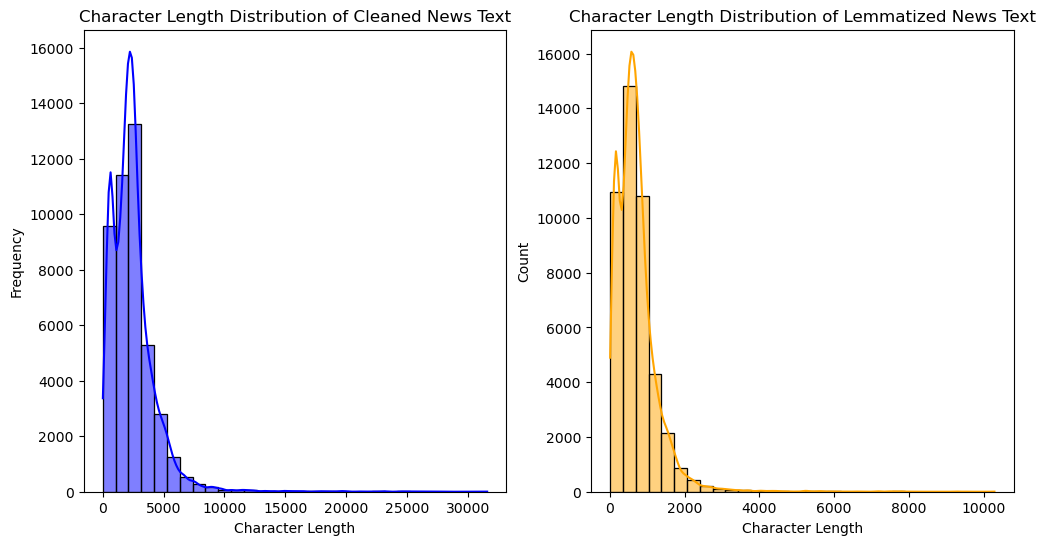

In [27]:
# Create a histogram plot to visualise character lengths
plt.figure(figsize=(12, 6))

# Add histogram for cleaned news text
plt.subplot(1, 2, 1)
sns.histplot(df_clean['cleaned_text_length'], bins=30, kde=True, color='blue')
plt.title('Character Length Distribution of Cleaned News Text')
plt.xlabel('Character Length')
plt.ylabel('Frequency')           

# Add histogram for lemmatized news text with POS tags removed
plt.subplot(1, 2, 2)
sns.histplot(df_clean['lemmatized_text_length'], bins=30, kde=True,ax=plt.gca(), color='orange')
plt.title('Character Length Distribution of Lemmatized News Text')
plt.xlabel('Character Length')

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

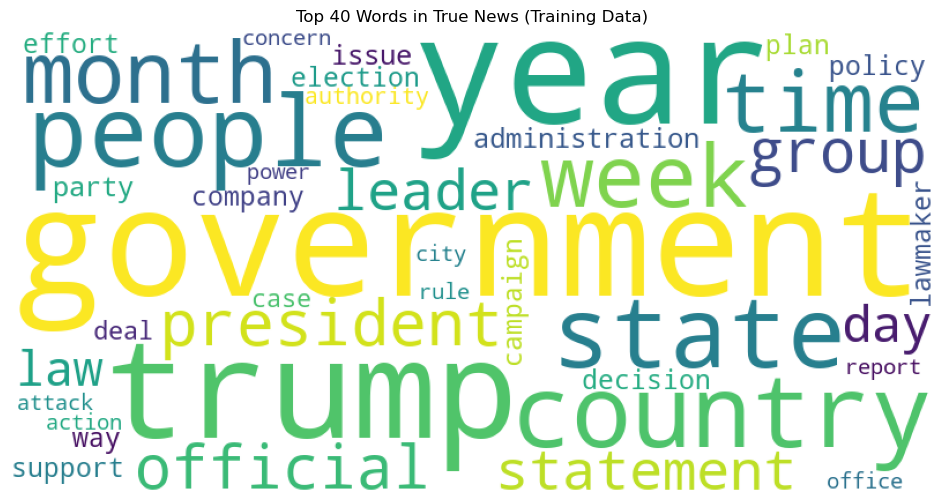

In [28]:
# Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text
from wordcloud import WordCloud
# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_text = X_train[y_train == 1]
true_text_combined = ' '.join(true_news_text.astype(str))

# Generate word cloud for True News
wordcloud_true = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(true_text_combined)
# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_true)
plt.axis('off')
plt.title('Top 40 Words in True News (Training Data)')
plt.show()


##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

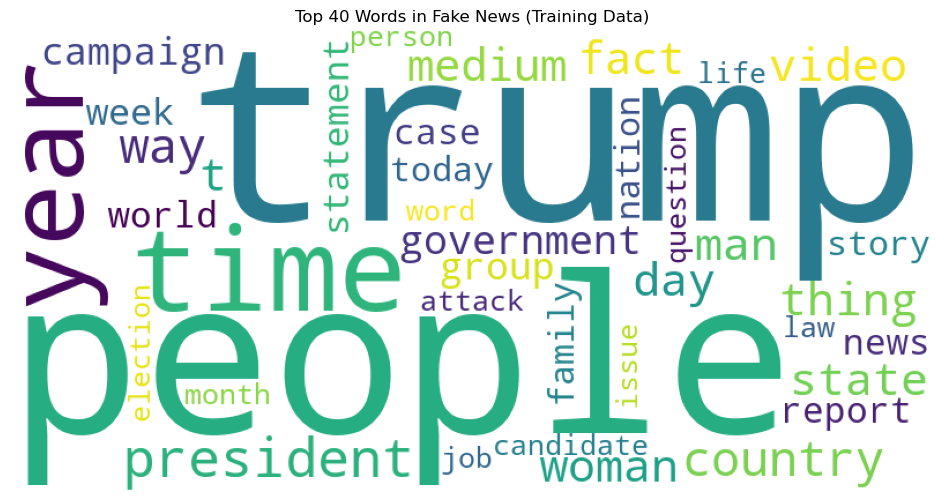

In [29]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news_text = X_train[y_train == 0]
fake_text_combined = ' '.join(fake_news_text.astype(str))

# Generate word cloud for Fake News
wordcloud_fake = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(fake_text_combined)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_fake)
plt.axis('off')
plt.title('Top 40 Words in Fake News (Training Data)')
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [30]:
# Write a function to get the specified top n-grams

from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(text_series, ngram_range=(1,1), n=10):
    """
    Returns the top n n-grams and their frequencies from a pandas Series of text.
    Args:
        text_series: pandas Series of strings (documents)
        ngram_range: tuple (min_n, max_n), e.g. (1,1) for unigrams, (2,2) for bigrams, (3,3) for trigrams
        n: number of top n-grams to return
    Returns:
        List of tuples: (ngram, frequency)
    """
    vec = CountVectorizer(ngram_range=ngram_range).fit(text_series)
    bag_of_words = vec.transform(text_series)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]
    return words_freq

# Example usage:
# top_unigrams = get_top_ngrams(X_train[y_train == 1], ngram_range=(1,1), n=10)
# top_bigrams = get_top_ngrams(X_train[y_train == 1], ngram_range=(2,2), n=10)
# top_trigrams = get_top_ngrams(X_train[y_train == 1], ngram_range=(3,3), n=10)
# print("Top 10 unigrams:", top_unigrams)
# print("Top 10 bigrams:", top_bigrams)
# print("Top 10

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [31]:
# Handle NaN values in the text data
X_train = X_train.fillna('')
X_val = X_val.fillna('')



### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 unigrams in True News:
1. trump (24646)
2. state (14374)
3. government (13748)
4. year (13188)
5. people (10728)
6. election (9964)
7. country (9904)
8. official (9107)
9. party (8352)
10. campaign (7674)


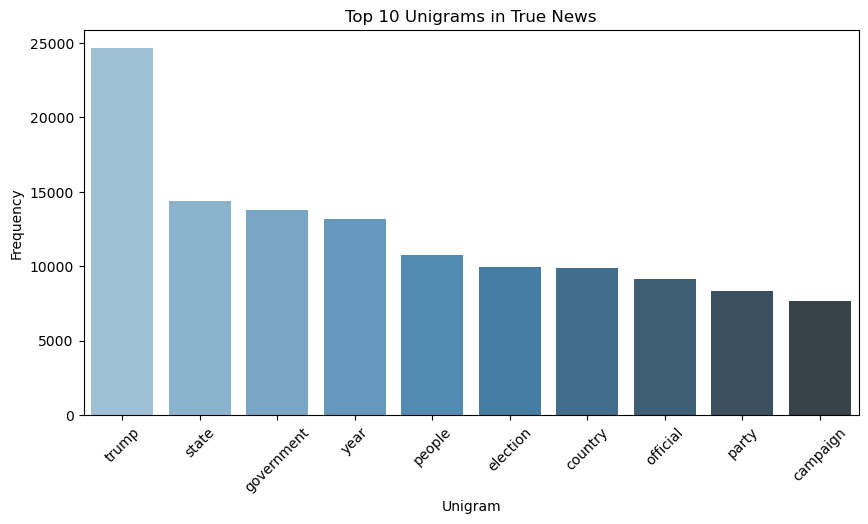

In [32]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph

top10_unigrams_true = get_top_ngrams(X_train[y_train == 1], ngram_range=(1,1), n=10)

# Print as a ranked list
print("Top 10 unigrams in True News:")
for i, (word, freq) in enumerate(top10_unigrams_true, 1):
    print(f"{i}. {word} ({freq})")

# Plot as a bar graph
words, freqs = zip(*top10_unigrams_true)
plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(freqs), palette="Blues_d")
plt.title("Top 10 Unigrams in True News")
plt.xlabel("Unigram")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 bigrams in True News:
1. trump campaign (1143)
2. news conference (952)
3. percent percent (776)
4. climate change (740)
5. tax reform (738)
6. request comment (704)
7. security force (683)
8. house representative (664)
9. trump administration (618)
10. intelligence agency (617)


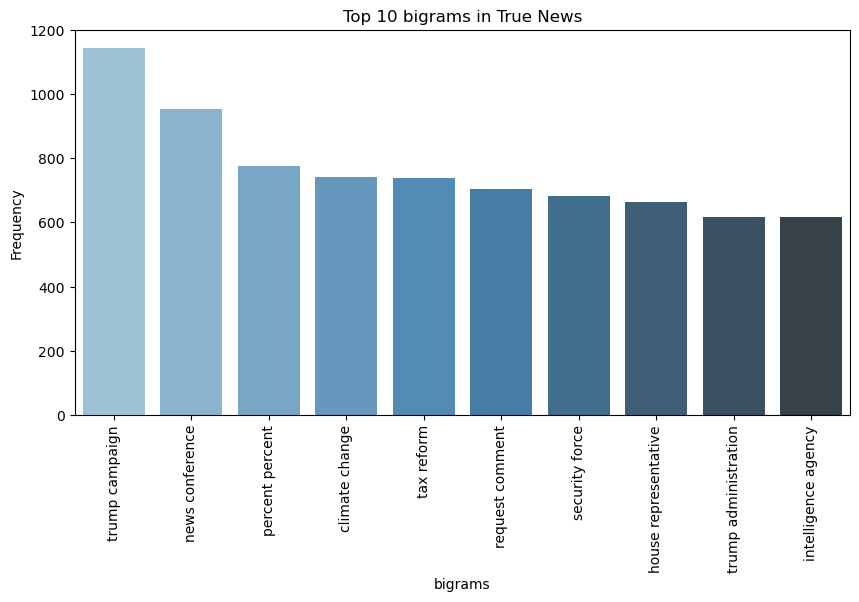

In [33]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top10_bigrams_true = get_top_ngrams(X_train[y_train == 1], ngram_range=(2,2), n=10)

# Print as a ranked list
print("Top 10 bigrams in True News:")
for i, (word, freq) in enumerate(top10_bigrams_true, 1):
    print(f"{i}. {word} ({freq})")

# Plot as a bar graph
words, freqs = zip(*top10_bigrams_true)
plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(freqs), palette="Blues_d")
plt.title("Top 10 bigrams in True News")
plt.xlabel("bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 trigrams in True News:
1. official condition anonymity (210)
2. trump transition team (168)
3. tax rate percent (166)
4. article staff involvement (131)
5. staff involvement creation (131)
6. involvement creation production (131)
7. state department official (126)
8. rate percent percent (117)
9. circuit court appeal (110)
10. trump travel ban (107)


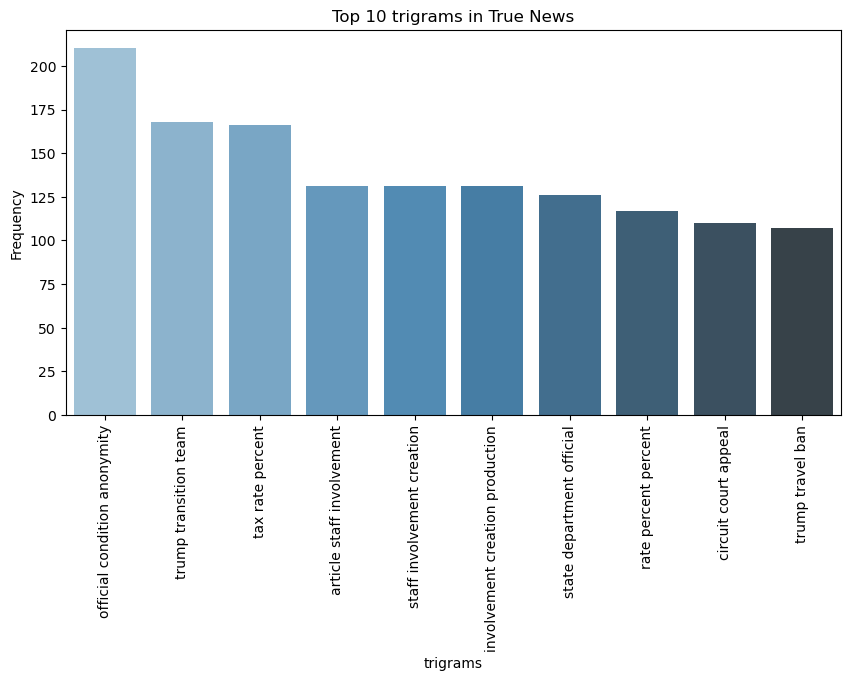

In [34]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top10_trigrams = get_top_ngrams(X_train[y_train == 1], ngram_range=(3,3), n=10)
# Print as a ranked list
print("Top 10 trigrams in True News:")
for i, (word, freq) in enumerate(top10_trigrams, 1):
    print(f"{i}. {word} ({freq})")

# Plot as a bar graph
words, freqs = zip(*top10_trigrams)
plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(freqs), palette="Blues_d")
plt.title("Top 10 trigrams in True News")
plt.xlabel("trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 unigram in Fake News:
1. trump (35860)
2. people (18486)
3. time (11249)
4. year (10532)
5. president (10387)
6. image (9613)
7. state (8769)
8. woman (8043)
9. video (8040)
10. campaign (7826)


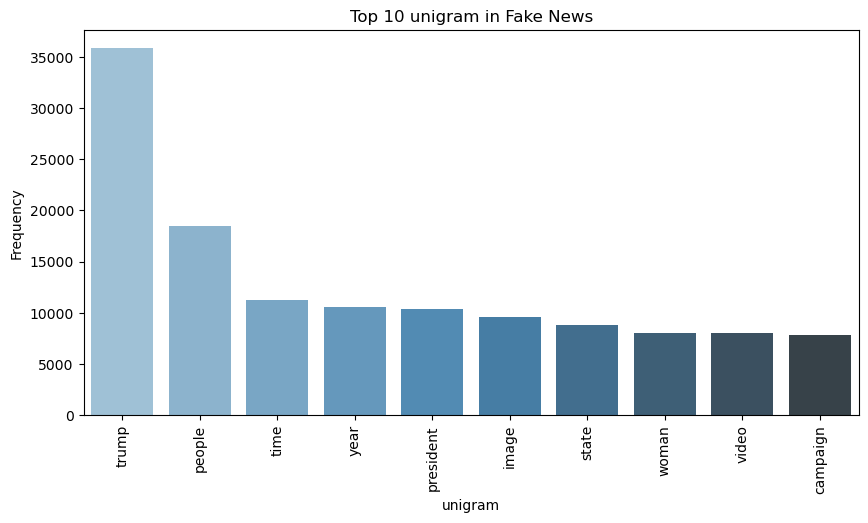

In [35]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top10_unigrams_fake = get_top_ngrams(X_train[y_train == 0], ngram_range=(1,1), n=10)
# Print as a ranked list
print("Top 10 unigram in Fake News:")
for i, (word, freq) in enumerate(top10_unigrams_fake, 1):
    print(f"{i}. {word} ({freq})")

# Plot as a bar graph
words, freqs = zip(*top10_unigrams_fake)
plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(freqs), palette="Blues_d")
plt.title("Top 10 unigram in Fake News")
plt.xlabel("unigram")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()


##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 bigram in Fake News:
1. trump supporter (1480)
2. century wire (1305)
3. trump campaign (1175)
4. police officer (1166)
5. image image (1092)
6. law enforcement (1067)
7. trump realdonaldtrump (1021)
8. screen capture (921)
9. donald trump (916)
10. mainstream medium (722)


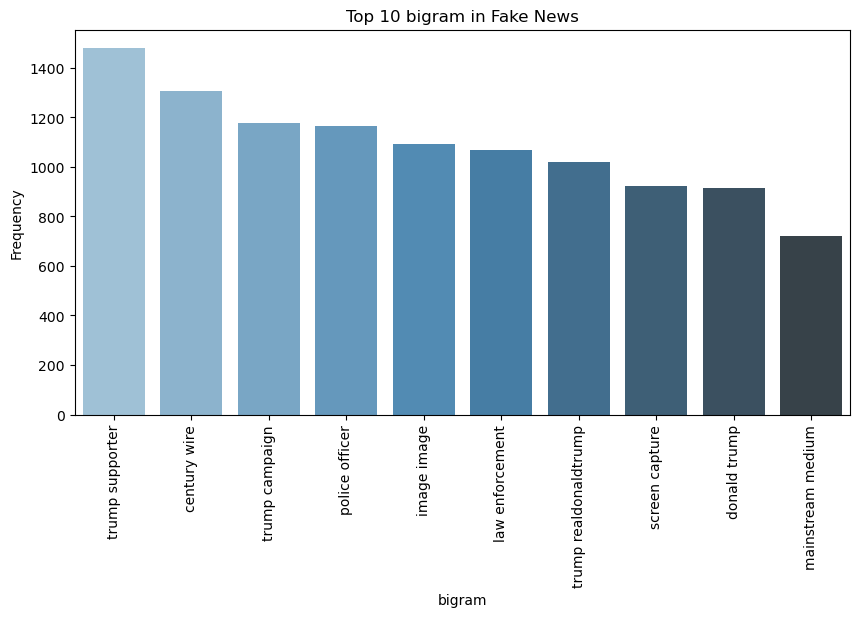

In [36]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top10_bigrams_fake = get_top_ngrams(X_train[y_train == 0], ngram_range=(2,2), n=10)
# Print as a ranked list
print("Top 10 bigram in Fake News:")
for i, (word, freq) in enumerate(top10_bigrams_fake, 1):
    print(f"{i}. {word} ({freq})")

# Plot as a bar graph
words, freqs = zip(*top10_bigrams_fake)
plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(freqs), palette="Blues_d")
plt.title("Top 10 bigram in Fake News")
plt.xlabel("bigram")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()


##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 bigram in Fake News:
1. news century wire (629)
2. video screen capture (492)
3. image video screen (471)
4. image getty image (414)
5. image screen capture (316)
6. image chip image (172)
7. law enforcement officer (163)
8. broadcast boiler room (156)
9. tune radio network (151)
10. radio network acr (151)


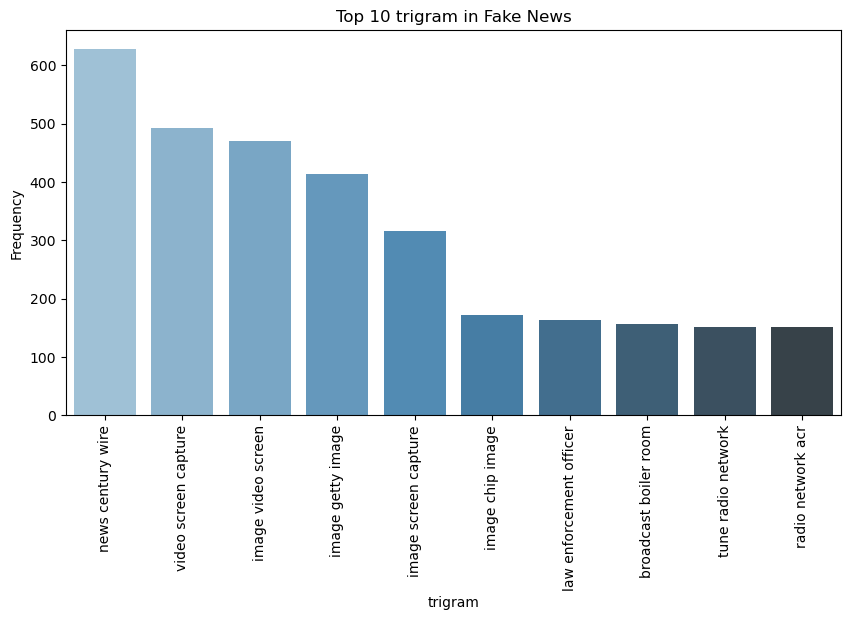

In [37]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top10_trigrams_fake = get_top_ngrams(X_train[y_train == 0], ngram_range=(3,3), n=10)
# Print as a ranked list
print("Top 10 bigram in Fake News:")
for i, (word, freq) in enumerate(top10_trigrams_fake, 1):
    print(f"{i}. {word} ({freq})")

# Plot as a bar graph
words, freqs = zip(*top10_trigrams_fake)
plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(freqs), palette="Blues_d")
plt.title("Top 10 trigram in Fake News")
plt.xlabel("trigram")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [38]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [39]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [40]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [41]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [42]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [43]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [44]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [45]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [46]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [47]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [48]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [49]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [ ]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim
import gensim.downloader as api
from gensim.models import KeyedVectors
word2vec_model = api.load("word2vec-google-news-300")

'''If the loading from the internet does not work, use the below line to load it from local directory
before that download the "GoogleNews-vectors-negative300.bin" file and place it in the same directory as this notebook
use below URL to download the file
https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300
or
https://www.kaggle.com/datasets/leadbest/googlenewsvectorsnegative300?resource=download
'''

#word2vec_model = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)



### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [64]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data

def document_vector(doc, model):
    # Remove out-of-vocab words
    words = [word for word in doc.split() if word in model]
    if len(words) == 0:
        # Return a zero vector if no words are in the model
        return np.zeros(model.vector_size)
    return np.mean(model[words], axis=0)

# Compute document vectors for training and validation sets
X_train_vectors = np.vstack(X_train.apply(lambda x: document_vector(x, word2vec_model)))
X_val_vectors = np.vstack(X_val.apply(lambda x: document_vector(x, word2vec_model)))

## Extract the target variable for the training data and validation data
y_train = y_train.values
y_val = y_val.values



## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [66]:
## Initialise Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

## Train Logistic Regression model on training data
log_reg.fit(X_train_vectors, y_train)

## Predict on validation data
y_pred_log_reg = log_reg.predict(X_val_vectors)


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [69]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_log_reg):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_log_reg):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_log_reg):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_log_reg):.4f}")



Logistic Regression Performance:
Accuracy: 0.9009
Precision: 0.8951
Recall: 0.8991
F1-Score: 0.8971


In [68]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_log_reg))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      6996
           1       0.90      0.90      0.90      6474

    accuracy                           0.90     13470
   macro avg       0.90      0.90      0.90     13470
weighted avg       0.90      0.90      0.90     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [70]:
## Initialise Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)

## Train Decision Tree model on training data
dt_classifier.fit(X_train_vectors, y_train)

## Predict on validation data
y_pred_dt = dt_classifier.predict(X_val_vectors)


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [71]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_dt):.4f}")



Decision Tree Performance:
Accuracy: 0.8265
Precision: 0.8395
Recall: 0.7901
F1-Score: 0.8140


In [72]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_dt))




Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      6996
           1       0.84      0.79      0.81      6474

    accuracy                           0.83     13470
   macro avg       0.83      0.83      0.83     13470
weighted avg       0.83      0.83      0.83     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [73]:
## Initialise Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

## Train Random Forest model on training data
rf_classifier.fit(X_train_vectors, y_train)

## Predict on validation data
y_pred_rf = rf_classifier.predict(X_val_vectors)


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [74]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("Logistic Regression Performance:")

print(f"Accuracy: {accuracy_score(y_val, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_rf):.4f}")




Logistic Regression Performance:
Accuracy: 0.9047
Precision: 0.9103
Recall: 0.8892
F1-Score: 0.8997


In [75]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_rf))



Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      6996
           1       0.91      0.89      0.90      6474

    accuracy                           0.90     13470
   macro avg       0.91      0.90      0.90     13470
weighted avg       0.90      0.90      0.90     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

## Summary of Findings:

### Patterns Observed:
During EDA, true and fake news showed distinct word usage and n-gram patterns. True news often contained more formal and topic-specific nouns, while fake news had more repetitive and sensational terms. The character length distributions also differed, with lemmatization reducing text length and highlighting key nouns.

### Semantic Classification Impact:
Using Word2Vec embeddings allowed the models to capture semantic relationships between words, improving the ability to distinguish between true and fake news beyond simple keyword matching. This approach helped the models generalize better to unseen data by leveraging word context and meaning.

### Best Model and Evaluation Metric:
Among the models tested (Logistic Regression, Decision Tree, Random Forest), the Random Forest model achieved the highest accuracy and F1-score on the validation set. The F1-score was prioritized as the main metric due to the importance of balancing precision and recall in fake news detection, where both false positives and false negatives are costly.

### Assessment:
The semantic approach using Word2Vec and supervised models significantly improved classification performance compared to basic text features. The chosen model (Random Forest) provided robust results, making the system effective for real-world fake news detection and helping to reduce misinformation.